# Pandas - работа с таблицами

## Открытие файлов ч. 2

Наиболее популярные форматы файлов для работы с таблицами в "оконных" приложениях - xls(x) и ods. Pandas позволяет открывать и такие файлы, не конвертируя их предварительно в csv. Для этого есть функция в `pandas` `read_excel`.

Вот её параметры:

In [ ]:
pandas.read_excel(io, sheet_name=0, header=0, names=None,
                  index_col=None, usecols=None, squeeze=None,
                  dtype=None, engine=None, converters=None,
                  true_values=None, false_values=None,
                  skiprows=None, nrows=None, na_values=None,
                  keep_default_na=True, na_filter=True,
                  verbose=False, parse_dates=False, date_parser=None,
                  thousands=None, decimal='.', comment=None,
                  skipfooter=0, convert_float=None, 
                  mangle_dupe_cols=True, storage_options=None)

С её помощью можно открыть файлы с расширениями `xls`, `xlsx`, `xlsm`, `xlsb`, `odf`, `ods` и `odt`из локальной операционной системы и по URL. Поддерживает чтение одного или нескольких листов.

### Параметры

`io` - тип `str`, bytes, ExcelFile, xlrd.Book, путь или файлоподобный объект.
Подходит любой корректный путь в виде строки. Строка может быть URL.

`sheet_name` - тип `str`, `int`, `list` или `None`, по умолчанию 0
Строки - это имена листов. Целые числа - их номера, начиная с нуля, листы с диаграммами не считаются. Списки строк или целых чисел применяются для чтения нескольких листов. `None` позволяет извлечь все листы.

**Примеры:**

По умолчанию используемый `0`: 1-й лист как датафрейм

`1`: 2-й лист как датафрейм

`"Sheet1"`: загружается лист с именем "Sheet1"

`[0, 1, "Sheet5"]`: загружает первый и второй листы, а также лист под именем "Sheet5" как словарь датафреймов.

`None`: все листы.

`header` - `int`, `list` элементов типа `int`, по умолчанию 0
Ряд (нумерация с 0), который станет заголовочным для датафрейма. Если взять список целых чисел, получим MultiIndex (рассмотрим позднее). `None`  - в файле нет заголовочного ряда.

`names` массив-подобный, по умолчанию `None`
Список имён для колонок. Если файл не содержит заголовочного ряда, необходимо явно передать в функцию `header=None`.

`index_col` - `int`, `list` элементов типа `int`, по умолчанию `None`
Колонки (пронумерованные с 0), которые нужно использовать как имена рядов. Нужно `None`,если такой колонки нет. Если передать `list`, эти колонки будут скомбинированы как MultiIndex. Если при этом выбрано подмножество колонокс помощью `usecols`, `index_col` будет высчитываться внутри него.

`usecols` - `int`, `str`, `list`-подобный или функция, по умолчанию `None`
Если `None`, будут прочитаны все колонки.

Если `str`, то эта строка должна содержать разделённый запятыми список букв Excel-колонок и диапазонов колонок (например, `"A:E"` (колонки с A до E) или `"A,C,E:F"`). ⚠ **Диапазоны включают *оба* конца**.

Если `list` элементов типа `int`, это показывает список номеров колонок, которые будут прочитаны.

Если `list` элементов типа `str`, это показывает список имён колонок, которые будут прочитаны.

Если функция, то она должна получить имя колонки, обработать, и если вернёт `True`, то колонку нужно включить в датафрейм.

Returns a subset of the columns according to behavior above.

`squeeze` - `bool`, по умолчанию `False`
Если данные содержат только одну колонку, вернётся Series.

⌛ Устарело с версии 1.4.0: допишите `.squeeze("columns")` к вызову `read_excel`, чтобы это сделать.

`dtype` - имя типа или словарь с ключами - именами колонок и значениями - их типами, по умолчанию `None`
Тип данных всего датафрейма или каждой из колонок. Например, `{'a': np.float64, 'b': np.int32}`. Если `converters` определены (см. ниже), будут применены именно они, а не `dtype`.

`engine` - `str`, по умолчанию `None`
Если `io` (первый аргумент, идентифицирует файл) не буфер и не путь, необходимо установить этот параметр, чтобы знать, как читать файл. Поддерживаемые движки: `"xlrd"`, `"openpyxl"`, `"odf"`, `"pyxlsb"`. Совместимость движков:

`"xlrd"` - "старые" Excel-файлы (`.xls`).

`"openpyxl"` "новые" Excel-файлы (`.xlsx` и другие).

`"odf"` - файлы формата OpenDocument(`.odf`, `.ods`, `.odt`).

`"pyxlsb"` - бинарные Excel-файлы.

Начиная с версии 1.2.0: движок `xlrd` поддерживает только "старые" `.xls`-файлы. When engine=`None`, the following logic will be used to determine the engine:

Если путь или буфер имеет формат OpenDocument(.odf, .ods, .odt), будет применён `odf`;

иначе если путь или буфер имеет формат `xls`, будет применён `xlrd`;

иначе если путь или буфер имеет формат `xlsb`, будет применён `pyxlsb`.

Начиная с версии 1.3.0.:

во всех остальных случаях будет применён `openpyxl`.

`converters` - `dict`, по умолчанию `None`
Словарь функций для конвертирования значений в определённых колонках. Ключи могут быть целыми читслами или именами колонок, значения принимают один аргумент - содержимое Excel-ячейки - и возвращает его же в нужном формате.

`true_values` - `list`, по умолчанию `None`
Какие значения читать как `True`.

`false_values` - `list`, по умолчанию `None`
Какие значения читать как  `False`.

`skiprows` - `list`-подобный, `int`, или функция
Номера пропускаемых строк (начиная с 0) или число строк (`int`) с начала файла. Если фунция, то она должна оценивать номера рядов, возвращая`True`, если ряд нужно пропустить и `False` в противном случае. Пример корректной функции - `lambda x: x in [0, 2]`.

`nrows` - `int`, по умолчанию `None`
Сколько рядов нужно читать.

`na_values` - скаляр, `str`, `list`-подобный, словарь, по умолчанию `None`
Строки, которые нужно признать как `NA`/`NaN` - пустые значения. Если передан `dict`, в нём должны быть специфическия для колонок значения `NA`. По умолчанию, как `NaN` будут считаться: `''`, `'#N/A'`, `'#N/A N/A'`, `'#NA'`, `'-1.#IND'`, `'-1.#QNAN'`, `'-NaN'`, `'-nan'`, `'1.#IND'`, `'1.#QNAN'`, `'<NA>'`, `'N/A'`, `'NA'`, `'NULL'`, `'NaN'`, `'n/a'`, `'nan'`, `'null'`.

`keep_default_na` - `bool`, по умолчанию `True`
Включать ли значения `NaN` по умолчанию при чтении данных. В зависимости от того, что подано как `na_values`, поведение следующее:

Если `keep_default_na` - `True`, и `na_values` определены, `na_values` добавятся к значениям `NaN` по умолчанию.

Если `keep_default_na` - `True`, и `na_values` не определены, только значения `NaN` по умолчанию будут применены для чтения.

Если `keep_default_na` - `False`, и `na_values` определены, только значения `NaN`, описанные в `na_values`, будут применены для чтения.

Если `keep_default_na` - `False`, и `na_values` не определены, ничто не будет считаться `NaN`.

Если `na_filter` передан как `False`, параметры `keep_default_na` и `na_values` будут проигнорированы.

`na_filter` - `bool`, по умолчанию `True`
Выявлять ли недостающие значения (пустые строки и строки из списка `na_values`). Если в данных гарантируется отсутствие недостающих значений, `na_filter=False` улучшит производительность.

`verbose` -`bool`, по умолчанию `False`
Показывать ли количество NA-значений, помещённых в нечисловую колонку.

`parse_dates` - `bool`, `list`-подобный, или словарь, по умолчанию `False`

Поведение следующее:

`bool`. Если `True`, пытаемся парсить всё.

`list` элементов типа `int` или имён. Например, если `[1, 2, 3]`, пытаемся парсить колонки 1, 2, 3, каждую как отдельную дату.

`list` элементов типа `list`. Например, если `[[1, 3]]`, объединяем колонки 1 и 3 и парсим как единую колонку дат.

`dict`, например, `{'foo' : [1, 3]}` парсим колонки 1, 3 как даты, колонку-результат называем `'foo'`

Если колонка или индекс содержит дату, которая не парсится, вся колонка останется нетронутой. Если вы не хотите парсить *какие-то* ячейки как даты, измените их тип в Excel на "Text". Для нестандартного парсинга дат применяется `pd.to_datetime` после `pd.read_excel`.

`date_parser` - функция
Функция для конвертирования последовательности колонок строк в массив datetime. По умолчанию применяется `dateutil.parser.parser`. Pandas попытается вызвать `date_parser` тремя способами, переходя к следующему, если предыдущий вызвал ошибку: 1) передаёт массив (или несколько массивов,  как указано в функции) как аргументы; 2) объединяет внутри рядов строковые значения из колонок, определённых в `parse_dates` в единых массив и передаёт это; и 3) вызывает `date_parser` для каждого ряда (с учётом колонок, определённых в `parse_dates`) в качестве аргумента.

`thousands` - `sstr`, по умолчанию `None`
Разделитель разрядов для преврашения строковых колонок в числовые. **Нужно только для тех колонок, которые в Excel помечены как текст**, числовые колонки распознаются автоматически.

`decimal` - `str`, по умолчанию `'.'`
Символ, который будет считаться десятичной точкой. **Нужно только для тех колонок, которые в Excel помечены как текст**, числовые колонки распознаются автоматически.

`comment` - `str`, по умолчанию `None`
Символ(ы), с помощью которого в файле "закомментирован" кусок строки.

`skipfooter` - `int`, по умолчанию 0
Сколько рядов с конца выбросить (0-indexed).

`convert_float` - `bool`, по умолчанию `True`
Превращать ли целые по значению, но дробные по форме числа в `int` (например, 1.0 в 1). Если `False`, все числовые данные будут прочитаны как`float`: Excel хранит **все** числе как дробные.

⌛ Устарело, начиная с версии 1.3.0: в будущих версиях `convert_float` будет отсутствовать вообще

`mangle_dupe_cols` - `bool`, по умолчанию `True`
Колонки с одинаковыми именами будут отображаться как 'X', 'X.1', …'X.N' вместо 'X'…'X'. Передача `False` приведёт к перезаписи данных в случае дубликатов.

## Пример

Прочитаем файл как датафрейм и посмотрим на имена колонок:

In [4]:
import pandas as pd
df = pd.read_excel('example.xlsx')
df.columns

Index(['Time', 'No_9596', 'No_9596_des', 'Rub1', 'Rub1_des', 'Rub2',
       'Rub2_des'],
      dtype='object')

Построим графики для каждого из образцов:

<AxesSubplot:xlabel='Time'>

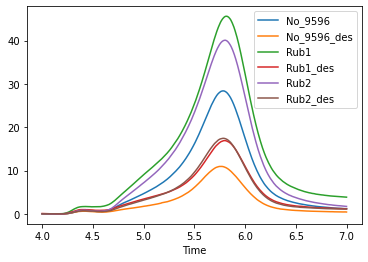

In [5]:
x, *y = df.columns
df.plot(x, y)

## Упражнение 1

Прочитайте как датафрейм файл `task1_salary.xls`, названия месяцев должны быть именами рядов, выведите на экран. Определите полную зарплату, сложив базовую и бонусную часть, за каждый месяц и за весь год.

## Сохранение датафреймов

Чтобы экспортировать датафрейм, есть методы [`to_csv`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.to_csv.html) и [`to_excel`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.to_excel.html). Попробуем экспортировать в csv датафрейм из примера:

In [8]:
filename = 'Result1.csv'
df.to_csv(filename)

Посмотрим на первые 10 строк полученного файла:

In [14]:
TEN = 10

def file_view(name_of_file, num_lines=TEN):
    with open(name_of_file) as f:
        for i in range(num_lines):
            print(f.readline(), end='')
            
            
file_view(filename)

,Time,No_9596,No_9596_des,Rub1,Rub1_des,Rub2,Rub2_des
0,4.0,0.037156,0.039475,0.030545,0.0922040000000006,0.019984,0.024869
1,4.001667,0.037164,0.040015,0.031574,0.0904310000000006,0.022624,0.02617
2,4.003333,0.036245,0.03751,0.033745,0.0872960000000003,0.026041,0.025703
3,4.005,0.034039,0.033747,0.036163,0.0833940000000002,0.029158,0.023331
4,4.006667,0.03101,0.031031,0.037872,0.0794930000000003,0.03085,0.02014
5,4.008333,0.028166,0.030431,0.038376,0.0765190000000002,0.030652,0.017771
6,4.01,0.026129,0.031594,0.037903,0.0753250000000003,0.028646,0.017682
7,4.011667,0.024907,0.033509,0.037049,0.0755520000000001,0.025315,0.020595
8,4.013333,0.024222,0.035176,0.036056,0.0754480000000006,0.021828,0.025943


Перед колонкой времени появилась безымянная колонка с номерами рядов. Чтобы она не возникала, применим аргумент `index=False`:

In [15]:
filename = 'Result2.csv'
df.to_csv(filename, index=False)
file_view(filename)

Time,No_9596,No_9596_des,Rub1,Rub1_des,Rub2,Rub2_des
4.0,0.037156,0.039475,0.030545,0.0922040000000006,0.019984,0.024869
4.001667,0.037164,0.040015,0.031574,0.0904310000000006,0.022624,0.02617
4.003333,0.036245,0.03751,0.033745,0.0872960000000003,0.026041,0.025703
4.005,0.034039,0.033747,0.036163,0.0833940000000002,0.029158,0.023331
4.006667,0.03101,0.031031,0.037872,0.0794930000000003,0.03085,0.02014
4.008333,0.028166,0.030431,0.038376,0.0765190000000002,0.030652,0.017771
4.01,0.026129,0.031594,0.037903,0.0753250000000003,0.028646,0.017682
4.011667,0.024907,0.033509,0.037049,0.0755520000000001,0.025315,0.020595
4.013333,0.024222,0.035176,0.036056,0.0754480000000006,0.021828,0.025943


В случае, если нужно избавиться от имён колонок, `header=False` позволяет это сделать. Если передать в него вместо этого массив строк, колонки будут переименованы.

## Упражнение 2

Откройте файл `task2_column_names.ods`, постройте графики для каждой из колонок от B до U в качестве ординаты с колонкой A  в качестве абсциссы. Сохраните датафрейм как Excel-файл (формат выберите в зависимости от версии MS Office, которая у вас установлена, если MS Office нет, сохраните как xlsx), причём переименуйте колонки, чтобы их имена были более понятны непосвящённому читателю: A означает контрольный образец, S - тестируемый образец, число - во сколько раз образец разбавлен, плюс или минус - наличие или отсутствие модулятора.

## Объединение датафреймов

Прочитаем как датафрейм файл `'example.xlsx'`, выберем из полученного датафрейма колонки с именами `No_9596_des`, `Rub1_des`, `Rub2_des`, умножим на два и поместим в новый датафрейм c переименованными колонками:

In [28]:
df = pd.read_excel('example.xlsx')
interesting = df.columns[2::2]
print(interesting)
df_new = df[interesting] * 2
df_new=df_new.rename({'No_9596_des':'No_9596_des x2',
               'Rub1_des':'Rub1_des x2',
               'Rub2_des':'Rub2_des x2'}, axis='columns')
df_new

Index(['No_9596_des', 'Rub1_des', 'Rub2_des'], dtype='object')


,No_9596_des x2,Rub1_des x2,Rub2_des x2
0,0.078950,0.184408,0.049738
1,0.080030,0.180862,0.052340
2,0.075020,0.174592,0.051406
3,0.067494,0.166788,0.046662
4,0.062062,0.158986,0.040280
...,...,...,...
1796,0.910262,2.367660,2.245658
1797,0.899238,2.372094,2.250766
1798,0.888616,2.377688,2.255342
1799,0.880416,2.380786,2.260964


Объединим датасеты:

In [29]:
big_df = pd.concat([df, df_new], axis=1)
big_df

,Time,No_9596,No_9596_des,Rub1,Rub1_des,Rub2,Rub2_des,No_9596_des x2,Rub1_des x2,Rub2_des x2
0,4.000000,0.037156,0.039475,0.030545,0.092204,0.019984,0.024869,0.078950,0.184408,0.049738
1,4.001667,0.037164,0.040015,0.031574,0.090431,0.022624,0.026170,0.080030,0.180862,0.052340
2,4.003333,0.036245,0.037510,0.033745,0.087296,0.026041,0.025703,0.075020,0.174592,0.051406
3,4.005000,0.034039,0.033747,0.036163,0.083394,0.029158,0.023331,0.067494,0.166788,0.046662
4,4.006667,0.031010,0.031031,0.037872,0.079493,0.030850,0.020140,0.062062,0.158986,0.040280
...,...,...,...,...,...,...,...,...,...,...
1796,6.993333,1.231811,0.455131,3.889206,1.183830,1.748527,1.122829,0.910262,2.367660,2.245658
1797,6.995000,1.228797,0.449619,3.885990,1.186047,1.742271,1.125383,0.899238,2.372094,2.250766
1798,6.996667,1.224017,0.444308,3.880668,1.188844,1.738206,1.127671,0.888616,2.377688,2.255342
1799,6.998333,1.218136,0.440208,3.873974,1.190393,1.735521,1.130482,0.880416,2.380786,2.260964


## Упражнение 3

Откройте файл `task1_salary.xls` как датафрейм, добавьте в него колонку `Total` с суммой бонуса и базы за каждый месяц. Сохраните как xlsx.